#Простые дифференциальные модели

In [4]:
import numpy as np
import sys
import matplotlib.pyplot as plt

###Метод Рунге-Кутта

In [1]:
def calc_Runge_Kutta(f, y, x, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h / 2, y + k1 / 2)
    k3 = h * f(x + h / 2, y + k2 / 2)
    k4 = h * f(x + h, y + k3)
    delta_y = (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return y + delta_y

In [65]:
def method_Runge_Kutta(f, y0, x0, a, b, N, eps, residue):
    x = x0
    y = y0
    h = (b - a) / N
    i = 0
    table = [[0, 0, y0]]
    t_values = [x0]
    y_values = [y0]
    target_y = 0
    target_x = 0
    flag = False

    while x < b:
        while np.abs(calc_Runge_Kutta(f, y, x, (b - a) / (2 * N)) - calc_Runge_Kutta(f, y, x, h)) / 15 > eps:
            N *= 2
            h = (b - a) / N

        y = calc_Runge_Kutta(f, y, x, h)
        i += 1
        x += h
        table.append([i, x, y])
        t_values.append(x)
        y_values.append(y)

        if x>residue and flag is False:
            target_y = y
            flag = True

    return table, t_values, y_values, target_y

###Модель процесса охлаждения тела

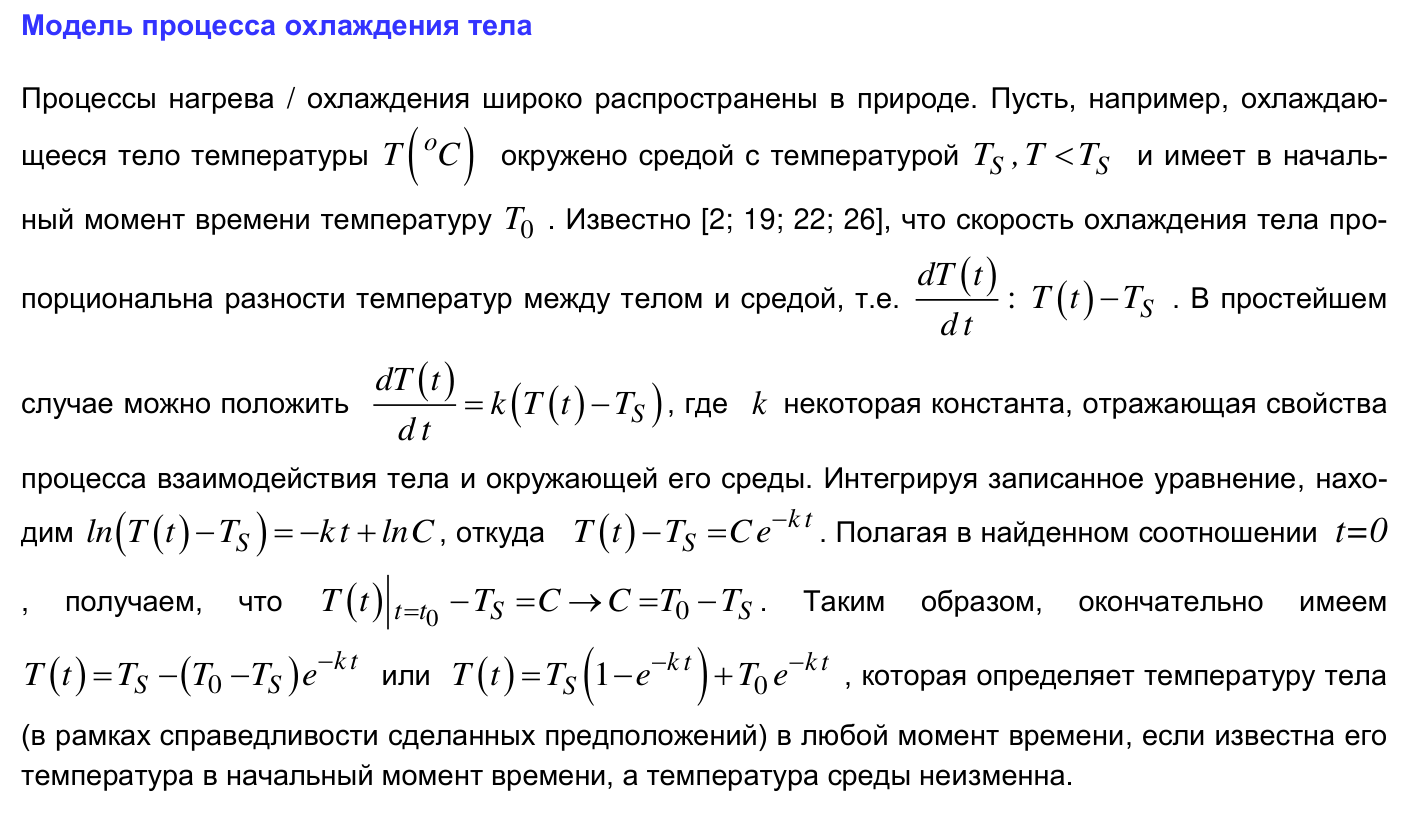

In [59]:
x0 = 0
T_0 = y0 = 100
a = 0
b = 100
T_t = 60
Ts = 25
t = 20

k = -np.log((T_t-Ts)/(T_0-Ts))/t
N = 128
eps = 0.0001
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [60]:
def f_cooling(x, y):
    return -k*(y-Ts)

In [61]:
def temperature(t):
  return Ts * (1 - np.exp(-k * t)) + T_0 * np.exp(-k * t)

In [67]:
res, t_vals, y_vals, y_target = method_Runge_Kutta(f_cooling, y0, x0, a, b, N, eps, t)

In [68]:
res = np.array(res, dtype=float)
print("iter\t   x\t\t   y")
print(res)

Выходные данные были обрезаны до нескольких последних строк (5000).
 [126073.             96.18606567     26.91961656]
 [126074.             96.18682861     26.91956075]
 [126075.             96.18759155     26.91950495]
 [126076.             96.18835449     26.91944914]
 [126077.             96.18911743     26.91939334]
 [126078.             96.18988037     26.91933753]
 [126079.             96.19064331     26.91928173]
 [126080.             96.19140625     26.91922593]
 [126081.             96.19216919     26.91917014]
 [126082.             96.19293213     26.91911434]
 [126083.             96.19369507     26.91905855]
 [126084.             96.19445801     26.91900275]
 [126085.             96.19522095     26.91894696]
 [126086.             96.19598389     26.91889117]
 [126087.             96.19674683     26.91883539]
 [126088.             96.19750977     26.9187796 ]
 [126089.             96.19827271     26.91872381]
 [126090.             96.19903564     26.91866803]
 [126091.     

In [69]:
t = np.array(range(0, 101))

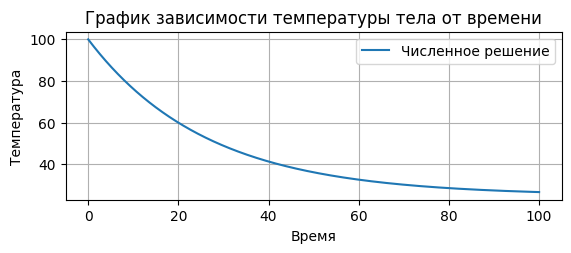

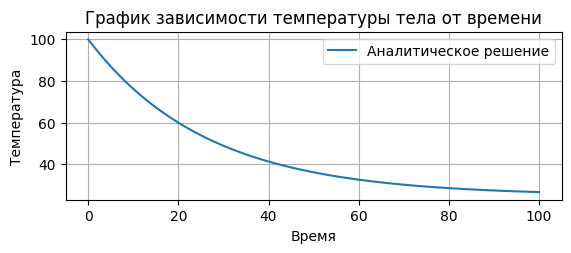

In [70]:
plt.subplot(2, 1, 1)
plt.plot(t_vals, y_vals, label='Численное решение')
plt.title('График зависимости температуры тела от времени')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.grid(True)
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(t, temperature(t), label='Аналитическое решение')
plt.title('График зависимости температуры тела от времени')
plt.xlabel('Время')
plt.ylabel('Температура')
plt.grid(True)
plt.legend()
plt.show()

###Модель процесса радиоактивного распада

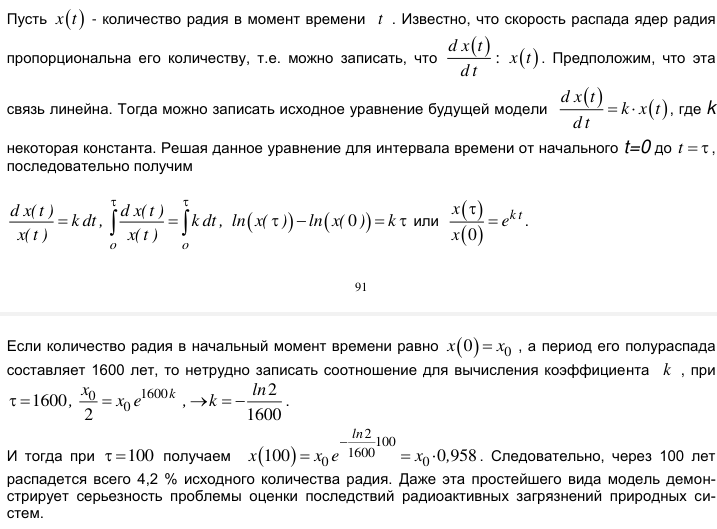

In [71]:
x0 = 0
y0 = 1000
a = 0
b = 101
t50 = 1600
k = -np.log(0.5)/t50
N = 4
eps = 0.001
residue = 100
np.set_printoptions(suppress=True, threshold=sys.maxsize)

In [72]:
def f_decay(x, y):
    return -k*y

In [82]:
def amount_of_radium(t):
  return y0 * np.exp(-k * t)

In [73]:
res, t_vals, y_vals, target_y = method_Runge_Kutta(f_decay, y0, x0, a, b, N, eps, residue)

In [78]:
print(f"{round(((y0-target_y)/y0) * 100, 2)}% вещества останется через 100 лет")

4.24% вещества останется через 100 лет


In [79]:
res = np.array(res, dtype=float)
print("iter\t   x\t\t   y")
print(res)

iter	   x		   y
[[   0.            0.         1000.        ]
 [   1.            0.04931641  999.97863552]
 [   2.            0.09863281  999.9572715 ]
 [   3.            0.14794922  999.93590794]
 [   4.            0.19726562  999.91454483]
 [   5.            0.24658203  999.89318218]
 [   6.            0.29589844  999.87181999]
 [   7.            0.34521484  999.85045825]
 [   8.            0.39453125  999.82909697]
 [   9.            0.44384766  999.80773614]
 [  10.            0.49316406  999.78637577]
 [  11.            0.54248047  999.76501586]
 [  12.            0.59179688  999.7436564 ]
 [  13.            0.64111328  999.7222974 ]
 [  14.            0.69042969  999.70093886]
 [  15.            0.73974609  999.67958077]
 [  16.            0.7890625   999.65822314]
 [  17.            0.83837891  999.63686596]
 [  18.            0.88769531  999.61550925]
 [  19.            0.93701172  999.59415298]
 [  20.            0.98632812  999.57279718]
 [  21.            1.03564453  999.5514

In [76]:
t = np.array(range(0, 102))

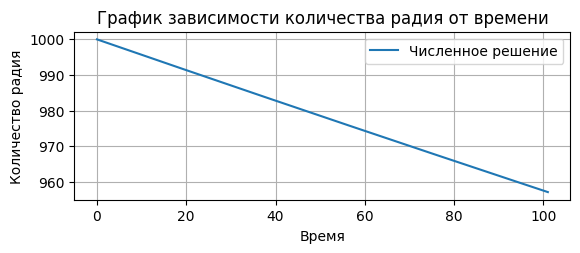

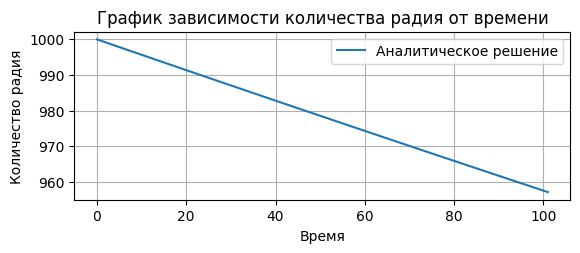

In [83]:
plt.subplot(2, 1, 1)
plt.plot(t_vals, y_vals, label='Численное решение')
plt.title('График зависимости количества радия от времени')
plt.xlabel('Время')
plt.ylabel('Количество радия')
plt.grid(True)
plt.legend()
plt.show()

plt.subplot(2, 1, 2)
plt.plot(t, amount_of_radium(t), label='Аналитическое решение')
plt.title('График зависимости количества радия от времени')
plt.xlabel('Время')
plt.ylabel('Количество радия')
plt.grid(True)
plt.legend()
plt.show()

###Модель реакции на рекламу

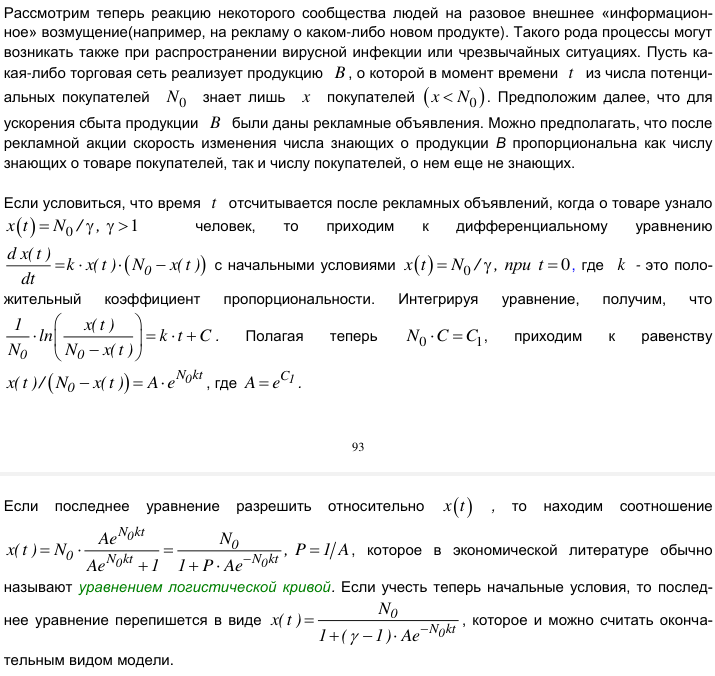